In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, recall_score

In [2]:
diagnos_data = pd.read_csv(r"D:\datascience__\end to end data sets-20230507T155014Z-001\end to end data sets\breast-cancer-data.csv")

Dataset: Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

In [3]:
diagnos_data.shape

(569, 33)

In [4]:
diagnos_data.head().T

,0,1,2,3,4
id,842302,842517,84300903,84348301,84358402
diagnosis,M,M,M,M,M
radius_mean,17.99,20.57,19.69,11.42,20.29
texture_mean,10.38,17.77,21.25,20.38,14.34
perimeter_mean,122.8,132.9,130.0,77.58,135.1
area_mean,1001.0,1326.0,1203.0,386.1,1297.0
smoothness_mean,0.1184,0.08474,0.1096,0.1425,0.1003
compactness_mean,0.2776,0.07864,0.1599,0.2839,0.1328
concavity_mean,0.3001,0.0869,0.1974,0.2414,0.198
concave points_mean,0.1471,0.07017,0.1279,0.1052,0.1043


Attribute Information:

1) ID number

2) Diagnosis (M = malignant, B = benign)

3-32):

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [5]:
diagnos_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

The data types are mostly of 'int' types. Let's convert the target variable 'diagnosis' from 'object' to 'category' type.

There's no null values in the dataset except the column 'Unnamed: 32'.

The columns: id, Unnamed: 32 are insignificant to the data analysis process. So, let's drop them.

In [6]:
diagnos_data['diagnosis'] = diagnos_data['diagnosis'].astype("category")

In [7]:
diagnos_data.drop(['id', 'Unnamed: 32'], axis = 1, inplace = True)

<Figure size 1080x432 with 0 Axes>

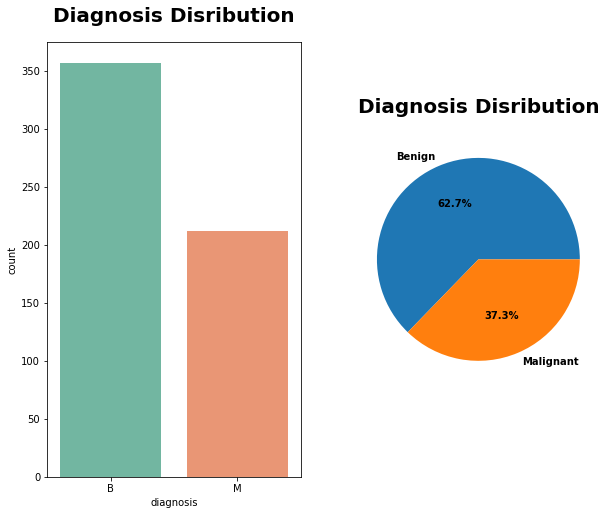

In [9]:
#Univariate Analysis of Target Variable
count = diagnos_data.diagnosis.value_counts()
labels = 'Benign', 'Malignant'

plt.figure(figsize=(15,6))
fig,ax = plt.subplots(figsize=(10,8))

plt.subplot(1,2,1)
sns.countplot(x ='diagnosis', data=diagnos_data, palette="Set2")
plt.title("Diagnosis Disribution",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=labels, autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"})
plt.title("Diagnosis Disribution",fontweight="black",size=20,pad=20)
plt.show()

62% of data is benign and 37% is malignant.

In [10]:
#Bi-variate Analysis
def bivariate_cat(data,col1,col2,rot):
    cross_tab = pd.crosstab(data[col1], data[col2]).apply(lambda x: x/x.sum()*100, axis=1).round(2)
    ct_exit = cross_tab['M'].sort_values(ascending=False)
    ct_exit.plot.bar(figsize=(12,5))
    plt.xlabel('{}'.format(col1))
    plt.ylabel('% of Malignant diagnosis'.format(col1))
    plt.title('{} Vs diagnosis'.format(col1))
    plt.xticks(rotation=rot)
    plt.show()
    return ct_exit

In [11]:
min(diagnos_data['radius_mean']), max(diagnos_data['radius_mean'])

(6.981, 28.11)

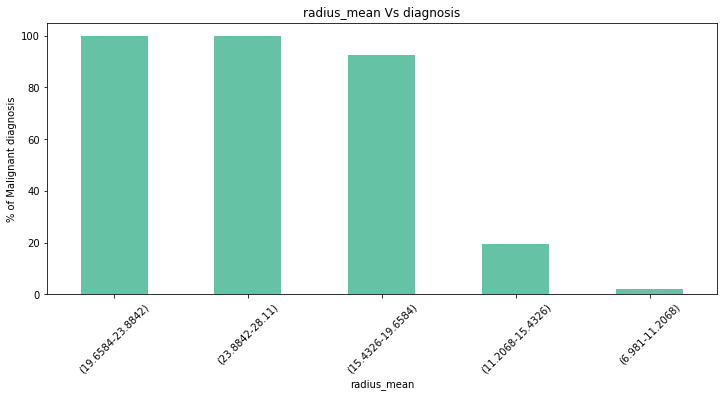

radius_mean
(19.6584-23.8842)    100.00
(23.8842-28.11)      100.00
(15.4326-19.6584)     92.38
(11.2068-15.4326)     19.43
(6.981-11.2068)        2.04
Name: M, dtype: float64

In [13]:
#bin radius_mean
diagnos_data['radius_mean'] = pd.cut(diagnos_data.radius_mean.to_list(), bins=[6.981,11.2068,15.4326,19.6584,23.8842,28.11], labels=['(6.981-11.2068)','(11.2068-15.4326)','(15.4326-19.6584)','(19.6584-23.8842)','(23.8842-28.11)'], include_lowest=True)
bivariate_cat(diagnos_data, 'radius_mean', 'diagnosis', 45)

Data with mean radius of 15 or above is malignant

In [14]:
min(diagnos_data['texture_mean']), max(diagnos_data['texture_mean'])

(9.71, 39.28)

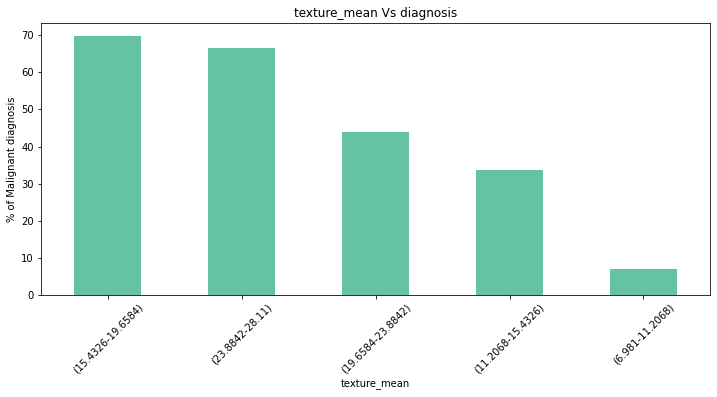

texture_mean
(15.4326-19.6584)    69.77
(23.8842-28.11)      66.67
(19.6584-23.8842)    44.00
(11.2068-15.4326)    33.78
(6.981-11.2068)       7.08
Name: M, dtype: float64

In [15]:
#bin texture_mean
diagnos_data['texture_mean'] = pd.cut(diagnos_data.texture_mean.to_list(), bins=[9.71,15.624,21.538,27.452,33.366,39.28], labels=['(6.981-11.2068)','(11.2068-15.4326)','(15.4326-19.6584)','(19.6584-23.8842)','(23.8842-28.11)'], include_lowest=True)
bivariate_cat(diagnos_data, 'texture_mean', 'diagnosis', 45)

Data with mean texture of 19 or above is susceptible to malignant.

In [16]:
min(diagnos_data['perimeter_mean']), max(diagnos_data['perimeter_mean'])

(43.79, 188.5)

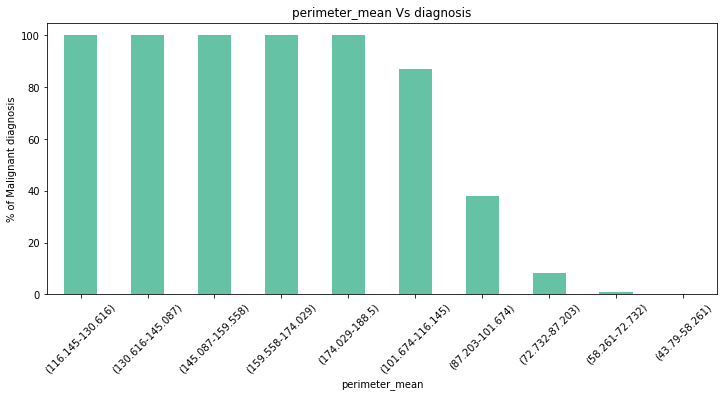

perimeter_mean
(116.145-130.616)    100.00
(130.616-145.087)    100.00
(145.087-159.558)    100.00
(159.558-174.029)    100.00
(174.029-188.5)      100.00
(101.674-116.145)     87.10
(87.203-101.674)      37.93
(72.732-87.203)        8.11
(58.261-72.732)        1.08
(43.79-58.261)         0.00
Name: M, dtype: float64

In [17]:
#bin perimeter_mean
diagnos_data['perimeter_mean'] = pd.cut(diagnos_data.perimeter_mean.to_list(), bins=[43.79,58.261,72.732,87.203,101.674,116.145,130.616,145.087,159.558,174.029,188.5], 
                                        labels=['(43.79-58.261)','(58.261-72.732)','(72.732-87.203)','(87.203-101.674)','(101.674-116.145)','(116.145-130.616)','(130.616-145.087)','(145.087-159.558)','(159.558-174.029)','(174.029-188.5)'], 
                                        include_lowest=True)
bivariate_cat(diagnos_data, 'perimeter_mean', 'diagnosis', 45)

Data with mean perimeter of 101 or above is malignant.

In [18]:
min(diagnos_data['area_mean']), max(diagnos_data['area_mean'])

(143.5, 2501.0)

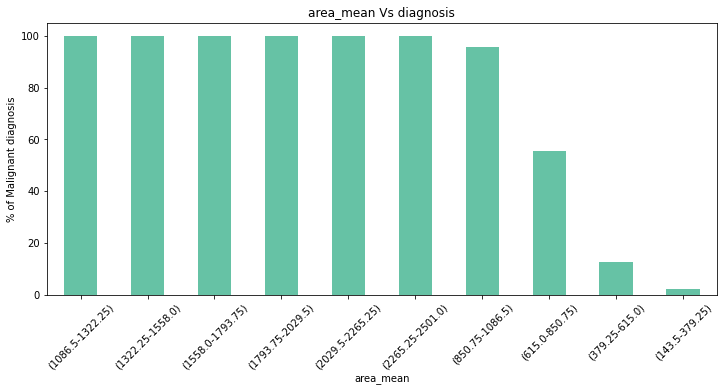

area_mean
(1086.5-1322.25)    100.00
(1322.25-1558.0)    100.00
(1558.0-1793.75)    100.00
(1793.75-2029.5)    100.00
(2029.5-2265.25)    100.00
(2265.25-2501.0)    100.00
(850.75-1086.5)      95.74
(615.0-850.75)       55.45
(379.25-615.0)       12.75
(143.5-379.25)        2.15
Name: M, dtype: float64

In [19]:
#bin perimeter_mean
diagnos_data['area_mean'] = pd.cut(diagnos_data.area_mean.to_list(), bins=[143.5,379.25,615.0,850.75,1086.5,1322.25,1558.0,1793.75,2029.5,2265.25,2501.0], 
                                        labels=['(143.5-379.25)','(379.25-615.0)','(615.0-850.75)','(850.75-1086.5)','(1086.5-1322.25)','(1322.25-1558.0)','(1558.0-1793.75)','(1793.75-2029.5)','(2029.5-2265.25)','(2265.25-2501.0)'], 
                                        include_lowest=True)
bivariate_cat(diagnos_data, 'area_mean', 'diagnosis', 45)

Data with mean area of 850 or above is malignant.

In [20]:
min(diagnos_data['smoothness_mean']), max(diagnos_data['smoothness_mean'])

(0.05263, 0.1634)

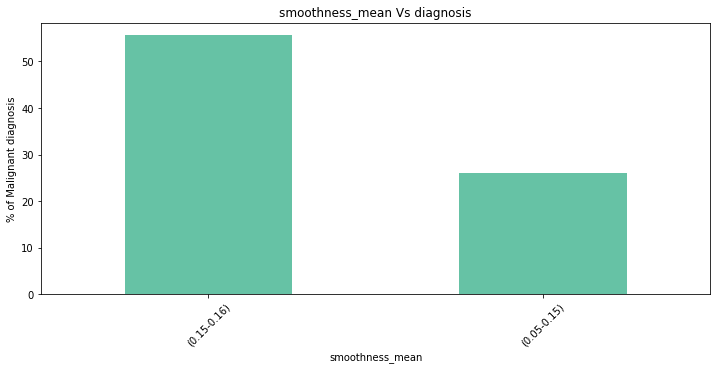

smoothness_mean
(0.15-0.16)    55.56
(0.05-0.15)    26.06
Name: M, dtype: float64

In [21]:
#bin smoothness_mean
diagnos_data['smoothness_mean'] = pd.cut(diagnos_data.smoothness_mean.to_list(), bins=[0.052629999999999996,0.1,0.1634], labels=['(0.05-0.15)','(0.15-0.16)'], include_lowest=True)
bivariate_cat(diagnos_data, 'smoothness_mean', 'diagnosis', 45)

In [22]:
min(diagnos_data['compactness_mean']), max(diagnos_data['compactness_mean'])

(0.01938, 0.3454)

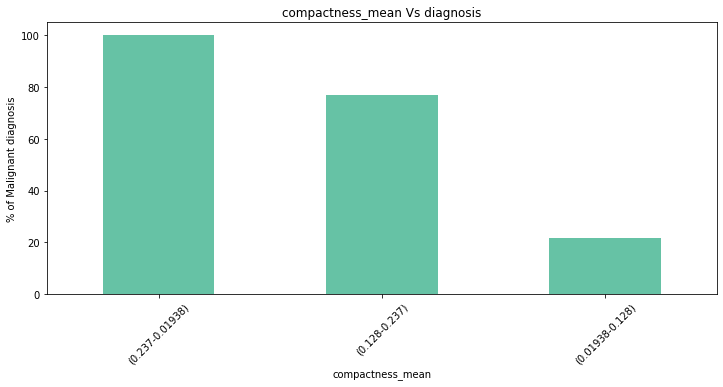

compactness_mean
(0.237-0.01938)    100.00
(0.128-0.237)       76.92
(0.01938-0.128)     21.55
Name: M, dtype: float64

In [23]:
#bin compactness_mean
diagnos_data['compactness_mean'] = pd.cut(diagnos_data.compactness_mean.to_list(), bins=[0.01938,0.128,0.237,0.3454], labels=['(0.01938-0.128)','(0.128-0.237)','(0.237-0.01938)'], include_lowest=True)
bivariate_cat(diagnos_data, 'compactness_mean', 'diagnosis', 45)

Data with mean compactness of 0.128 or above is susceptible to malignant and over 0.237 is malignant.

In [24]:
min(diagnos_data['concavity_mean']), max(diagnos_data['concavity_mean'])

(0.0, 0.4268)

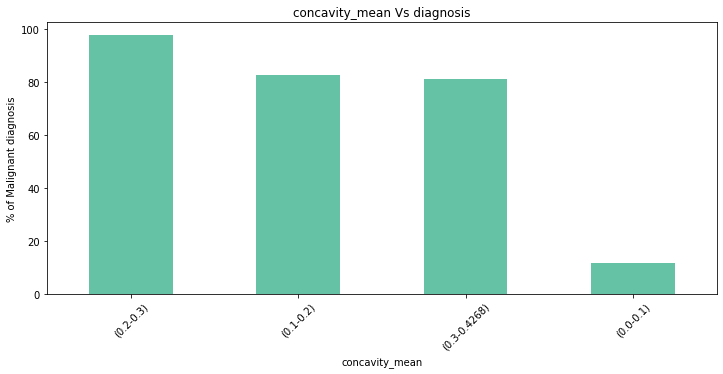

concavity_mean
(0.2-0.3)       97.62
(0.1-0.2)       82.61
(0.3-0.4268)    81.25
(0.0-0.1)       11.80
Name: M, dtype: float64

In [25]:
#bin concavity_mean
diagnos_data['concavity_mean'] = pd.cut(diagnos_data.concavity_mean.to_list(), bins=[0.0,0.1,0.2,0.3,0.4268], labels=['(0.0-0.1)','(0.1-0.2)','(0.2-0.3)','(0.3-0.4268)'], include_lowest=True)
bivariate_cat(diagnos_data, 'concavity_mean', 'diagnosis', 45)

Data with mean concavity of 0.3 or above is malignant.

In [26]:
diagnos_data.rename(columns = {'concave points_mean':'concave_points_mean', 'concave points_se':'concave_points_se', 'concave points_worst':'concave_points_worst'}, inplace = True)

In [27]:
min(diagnos_data['concave_points_mean']), max(diagnos_data['concave_points_mean'])

(0.0, 0.2012)

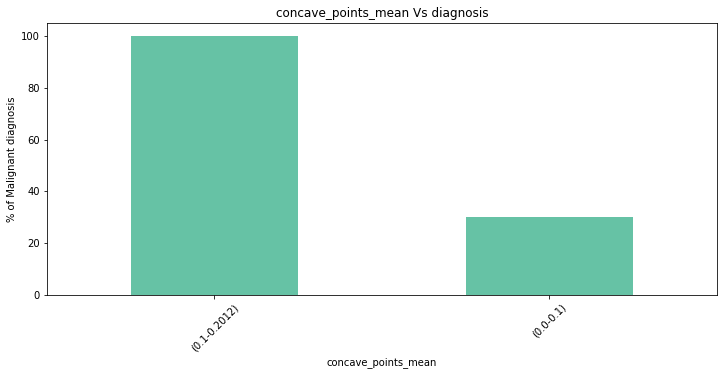

concave_points_mean
(0.1-0.2012)    100.0
(0.0-0.1)        30.0
Name: M, dtype: float64

In [28]:
#bin concave_points_mean
diagnos_data['concave_points_mean'] = pd.cut(diagnos_data.concave_points_mean.to_list(), bins=[0.0,0.1,0.2012], labels=['(0.0-0.1)','(0.1-0.2012)'], include_lowest=True)
bivariate_cat(diagnos_data, 'concave_points_mean', 'diagnosis', 45)

Data with mean concave-points of 0.1 or above is malignant.

In [29]:
min(diagnos_data['symmetry_mean']), max(diagnos_data['symmetry_mean'])

(0.106, 0.304)

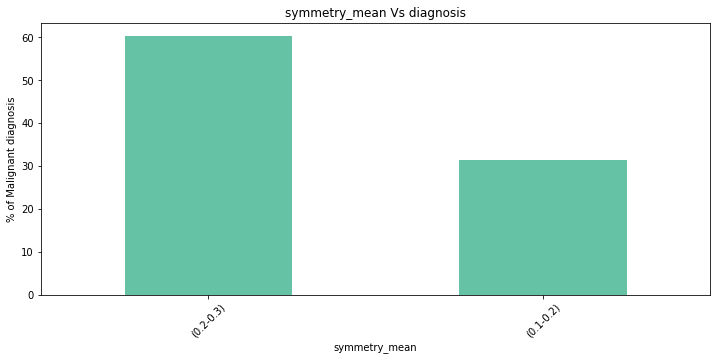

symmetry_mean
(0.2-0.3)    60.34
(0.1-0.2)    31.35
Name: M, dtype: float64

In [30]:
#bin symmetry_mean
diagnos_data['symmetry_mean'] = pd.cut(diagnos_data.symmetry_mean.to_list(), bins=[0.106,0.2,0.304], labels=['(0.1-0.2)','(0.2-0.3)'], include_lowest=True)
bivariate_cat(diagnos_data, 'symmetry_mean', 'diagnosis', 45)

In [31]:
min(diagnos_data['fractal_dimension_mean']), max(diagnos_data['fractal_dimension_mean'])

(0.04996, 0.09744)

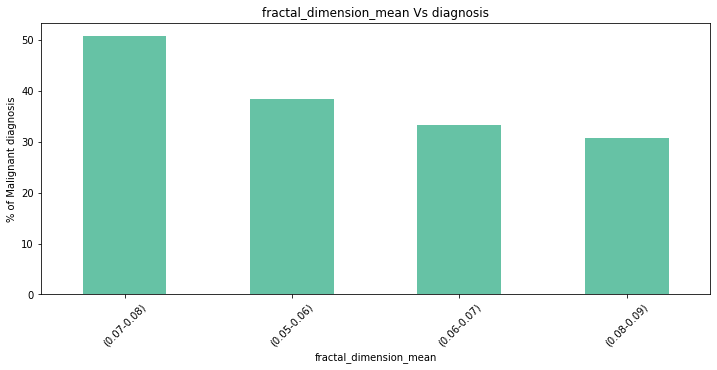

fractal_dimension_mean
(0.07-0.08)    50.77
(0.05-0.06)    38.36
(0.06-0.07)    33.21
(0.08-0.09)    30.77
Name: M, dtype: float64

In [32]:
#bin fractal_dimension_mean
diagnos_data['fractal_dimension_mean'] = pd.cut(diagnos_data.fractal_dimension_mean.to_list(), bins=[0.049960000000000004,0.05,0.06,0.07,0.08,0.09744], 
                                                labels=['(0.04-0.05)','(0.05-0.06)','(0.06-0.07)','(0.07-0.08)','(0.08-0.09)'], include_lowest=True)
bivariate_cat(diagnos_data, 'fractal_dimension_mean', 'diagnosis', 45)

Data with mean fractal dimension of 0.04 or above is malignant.

In [33]:
diagnos_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   diagnosis                569 non-null    category
 1   radius_mean              569 non-null    category
 2   texture_mean             569 non-null    category
 3   perimeter_mean           569 non-null    category
 4   area_mean                569 non-null    category
 5   smoothness_mean          569 non-null    category
 6   compactness_mean         569 non-null    category
 7   concavity_mean           569 non-null    category
 8   concave_points_mean      569 non-null    category
 9   symmetry_mean            569 non-null    category
 10  fractal_dimension_mean   568 non-null    category
 11  radius_se                569 non-null    float64 
 12  texture_se               569 non-null    float64 
 13  perimeter_se             569 non-null    float64 
 14  area_se   

In [34]:
cat_cols = []
for cols in diagnos_data.select_dtypes("category"):
    cat_cols.append(cols)
int_cols = []
for cols in diagnos_data.select_dtypes(["float64"]):
    int_cols.append(cols)

In [35]:
cat_cols

['diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave_points_mean',
 'symmetry_mean',
 'fractal_dimension_mean']

In [36]:
#chi-square relationship among categorical features

from scipy.stats import chi2_contingency

In [37]:
chi2, p_values = [], []
for f in cat_cols:
    chitest = chi2_contingency(pd.crosstab(diagnos_data[f], diagnos_data['diagnosis']))
    p_values.append(np.round(chitest[1],6))

chi_results = pd.DataFrame(p_values, index=cat_cols)

In [38]:
chi_results

,0
diagnosis,0.000000
radius_mean,0.000000
texture_mean,0.000000
perimeter_mean,0.000000
area_mean,0.000000
smoothness_mean,0.000000
compactness_mean,0.000000
concavity_mean,0.000000
concave_points_mean,0.000000
symmetry_mean,0.000000


chi-square value of fractal_dimension_mean is greater than 0.05 which can cause collinearity, and hence is dropped for further analysis.

In [39]:
diagnos_data = diagnos_data.drop("fractal_dimension_mean", axis=1)

In [40]:
#chi-square test between 'radius_mean' and 'diagnosis'
cross_tab = pd.crosstab(diagnos_data['radius_mean'], diagnos_data['diagnosis'], margins=True)
cross_tab

diagnosis,B,M,All
radius_mean,,,
(6.981-11.2068),96,2,98
(11.2068-15.4326),253,61,314
(15.4326-19.6584),8,97,105
(19.6584-23.8842),0,45,45
(23.8842-28.11),0,7,7
All,357,212,569


In [41]:
#use for chi-square test
import researchpy as rp

In [42]:
table,results = rp.crosstab(diagnos_data['radius_mean'], diagnos_data['diagnosis'], prop='col', test='chi-square')
results

,Chi-square test,results
0,Pearson Chi-square ( 4.0) =,318.7515
1,p-value =,0.0000
2,Cramer's V =,0.7485


In [43]:
#chi-square test between 'texture_mean' and 'diagnosis'
cross_tab = pd.crosstab(diagnos_data['texture_mean'], diagnos_data['diagnosis'], margins=True)
cross_tab

diagnosis,B,M,All
texture_mean,,,
(6.981-11.2068),105,8,113
(11.2068-15.4326),198,101,299
(15.4326-19.6584),39,90,129
(19.6584-23.8842),14,11,25
(23.8842-28.11),1,2,3
All,357,212,569


In [44]:
table,results = rp.crosstab(diagnos_data['texture_mean'], diagnos_data['diagnosis'], 
                            prop='col', test='chi-square')
results

,Chi-square test,results
0,Pearson Chi-square ( 4.0) =,105.4895
1,p-value =,0.0000
2,Cramer's V =,0.4306


In [45]:
#chi-square test between 'perimeter_mean' and 'diagnosis'
cross_tab = pd.crosstab(diagnos_data['perimeter_mean'], diagnos_data['diagnosis'], margins=True)
cross_tab

diagnosis,B,M,All
perimeter_mean,,,
(43.79-58.261),15,0,15
(58.261-72.732),92,1,93
(72.732-87.203),170,15,185
(87.203-101.674),72,44,116
(101.674-116.145),8,54,62
(116.145-130.616),0,49,49
(130.616-145.087),0,34,34
(145.087-159.558),0,8,8
(159.558-174.029),0,3,3


In [46]:
table,results = rp.crosstab(diagnos_data['perimeter_mean'], diagnos_data['diagnosis'], 
                            prop='col', test='chi-square')
results

,Chi-square test,results
0,Pearson Chi-square ( 9.0) =,359.1691
1,p-value =,0.0000
2,Cramer's V =,0.7945


In [47]:
#chi-square test between 'area_mean' and 'diagnosis'
cross_tab = pd.crosstab(diagnos_data['area_mean'], diagnos_data['diagnosis'], margins=True)
cross_tab

diagnosis,B,M,All
area_mean,,,
(143.5-379.25),91,2,93
(379.25-615.0),219,32,251
(615.0-850.75),45,56,101
(850.75-1086.5),2,45,47
(1086.5-1322.25),0,51,51
(1322.25-1558.0),0,14,14
(1558.0-1793.75),0,6,6
(1793.75-2029.5),0,3,3
(2029.5-2265.25),0,1,1


In [48]:
table,results = rp.crosstab(diagnos_data['area_mean'], diagnos_data['diagnosis'], 
                            prop='col', test='chi-square')
results

,Chi-square test,results
0,Pearson Chi-square ( 9.0) =,326.2661
1,p-value =,0.0000
2,Cramer's V =,0.7572


In [49]:
#chi-square test between 'smoothness_mean' and 'diagnosis'
cross_tab = pd.crosstab(diagnos_data['smoothness_mean'], diagnos_data['diagnosis'], margins=True)
cross_tab

diagnosis,B,M,All
smoothness_mean,,,
(0.05-0.15),261,92,353
(0.15-0.16),96,120,216
All,357,212,569


In [50]:
table,results = rp.crosstab(diagnos_data['smoothness_mean'], diagnos_data['diagnosis'], 
                            prop='col', test='chi-square')
results

,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,49.8633
1,p-value =,0.0000
2,Cramer's phi =,0.2960


In [51]:
#chi-square test between 'compactness_mean' and 'diagnosis'
cross_tab = pd.crosstab(diagnos_data['compactness_mean'], diagnos_data['diagnosis'], margins=True)
cross_tab

diagnosis,B,M,All
compactness_mean,,,
(0.01938-0.128),324,89,413
(0.128-0.237),33,110,143
(0.237-0.01938),0,13,13
All,357,212,569


In [52]:
table,results = rp.crosstab(diagnos_data['compactness_mean'], diagnos_data['diagnosis'], 
                            prop='col', test='chi-square')
results

,Chi-square test,results
0,Pearson Chi-square ( 2.0) =,161.7302
1,p-value =,0.0000
2,Cramer's V =,0.5331


In [53]:
#chi-square test between 'concavity_mean' and 'diagnosis'
cross_tab = pd.crosstab(diagnos_data['concavity_mean'], diagnos_data['diagnosis'], margins=True)
cross_tab

diagnosis,B,M,All
concavity_mean,,,
(0.0-0.1),329,44,373
(0.1-0.2),24,114,138
(0.2-0.3),1,41,42
(0.3-0.4268),3,13,16
All,357,212,569


In [54]:
table,results = rp.crosstab(diagnos_data['concavity_mean'], diagnos_data['diagnosis'], 
                            prop='col', test='chi-square')
results

,Chi-square test,results
0,Pearson Chi-square ( 3.0) =,303.5650
1,p-value =,0.0000
2,Cramer's V =,0.7304


In [55]:
#chi-square test between 'concave_points_mean' and 'diagnosis'
cross_tab = pd.crosstab(diagnos_data['concave_points_mean'], diagnos_data['diagnosis'], margins=True)
cross_tab

diagnosis,B,M,All
concave_points_mean,,,
(0.0-0.1),357,153,510
(0.1-0.2012),0,59,59
All,357,212,569


In [56]:
table,results = rp.crosstab(diagnos_data['concave_points_mean'], diagnos_data['diagnosis'], 
                            prop='col', test='chi-square')
results

,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,110.8476
1,p-value =,0.0000
2,Cramer's phi =,0.4414


In [57]:
#chi-square test between 'symmetry_mean' and 'diagnosis'
cross_tab = pd.crosstab(diagnos_data['symmetry_mean'], diagnos_data['diagnosis'], margins=True)
cross_tab

diagnosis,B,M,All
symmetry_mean,,,
(0.1-0.2),311,142,453
(0.2-0.3),46,70,116
All,357,212,569


In [58]:
table,results = rp.crosstab(diagnos_data['symmetry_mean'], diagnos_data['diagnosis'], 
                            prop='col', test='chi-square')
results

,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,33.2206
1,p-value =,0.0000
2,Cramer's phi =,0.2416


After checking the p-values, we have all independent features to build and train our model on.

In [59]:
#scaling up features
from sklearn.preprocessing import LabelEncoder

#target column
tgt_col = ['diagnosis']

#categorical columns
category_names = diagnos_data.nunique()[diagnos_data.nunique() < 15].keys().tolist()
category_names = [x for x in category_names if x not in tgt_col]

#numerical columns
num_cols = [i for i in diagnos_data.columns if i not in category_names+tgt_col]

#binary columns
bin_cols = diagnos_data.nunique()[diagnos_data.nunique()==2].keys().tolist()

#multi-columns
multi_cols = [i for i in category_names if i not in bin_cols]

#Label Encoding Binary columns
le = LabelEncoder()
for i in bin_cols:
    diagnos_data[i] = le.fit_transform(diagnos_data[i])

#duplicating cols for multi-value columns
diagnos_data = pd.get_dummies(data=diagnos_data, columns=multi_cols)

In [60]:
category_names

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave_points_mean',
 'symmetry_mean']

In [61]:
bin_cols

['diagnosis', 'smoothness_mean', 'concave_points_mean', 'symmetry_mean']

In [62]:
multi_cols

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'compactness_mean',
 'concavity_mean']

In [63]:
num_cols

['radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave_points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave_points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [64]:
#Normalising Numerical columns
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
diagnos_data[num_cols] = minmax.fit_transform(diagnos_data[num_cols].values)

In [65]:
diagnos_data.head().T

,0,1,2,3,4
diagnosis,1.000000,1.000000,1.000000,1.000000,1.000000
smoothness_mean,1.000000,0.000000,1.000000,1.000000,1.000000
concave_points_mean,1.000000,0.000000,1.000000,1.000000,1.000000
symmetry_mean,1.000000,0.000000,1.000000,1.000000,0.000000
radius_se,0.356147,0.156437,0.229622,0.139091,0.233822
...,...,...,...,...,...
compactness_mean_(0.237-0.01938),1.000000,0.000000,0.000000,1.000000,0.000000
concavity_mean_(0.0-0.1),0.000000,1.000000,0.000000,0.000000,0.000000
concavity_mean_(0.1-0.2),0.000000,0.000000,1.000000,0.000000,1.000000
concavity_mean_(0.2-0.3),0.000000,0.000000,0.000000,1.000000,0.000000


In [66]:
chi2, p_values = [], []
for f in num_cols:
    chitest = chi2_contingency(pd.crosstab(diagnos_data[f], diagnos_data['diagnosis']))
    p_values.append(np.round(chitest[1],6))

chi_results = pd.DataFrame(p_values, index=num_cols)

In [67]:
chi_results

,0
radius_se,0.280909
texture_se,0.522415
perimeter_se,0.226535
area_se,0.212835
smoothness_se,0.348358
compactness_se,0.360170
concavity_se,0.246177
concave_points_se,0.417754
symmetry_se,0.608326
fractal_dimension_se,0.448507


In [68]:
#diagnos_data.drop(['radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se',
#                   'concave_points_se','symmetry_se','fractal_dimension_se','texture_worst','perimeter_worst','area_worst',
#                   'smoothness_worst','compactness_worst','concavity_worst','symmetry_worst','fractal_dimension_worst'],
#                axis=1, inplace=True)

In [69]:
#Model Building
X = diagnos_data.drop(columns='diagnosis').copy()
Y = pd.DataFrame(diagnos_data['diagnosis'])

In [70]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 60 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   smoothness_mean                   569 non-null    int32  
 1   concave_points_mean               569 non-null    int32  
 2   symmetry_mean                     569 non-null    int32  
 3   radius_se                         569 non-null    float64
 4   texture_se                        569 non-null    float64
 5   perimeter_se                      569 non-null    float64
 6   area_se                           569 non-null    float64
 7   smoothness_se                     569 non-null    float64
 8   compactness_se                    569 non-null    float64
 9   concavity_se                      569 non-null    float64
 10  concave_points_se                 569 non-null    float64
 11  symmetry_se                       569 non-null    float64
 12  fractal_

In [71]:
Y

,diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


In [72]:
#Logistic Regression Using sklearn

#train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=0)

#initialise the model
logReg = LogisticRegression()

#traing the model
logReg.fit(X_train, Y_train)

#predict labels for test data
y_train_pred = logReg.predict(X_train)
y_test_pred = logReg.predict(X_test)

#predict probabilities
y_train_pred_prob = logReg.predict_proba(X_train)
y_test_pred_prob = logReg.predict_proba(X_test)

In [73]:
#Model Evaluation
train_score = logReg.score(X_train,Y_train)
print("Accuracy score on train data: ", train_score.round(2))

test_score = logReg.score(X_test,Y_test)
print("Accuracy score on test data: ", test_score.round(2))

Accuracy score on train data:  0.96
Accuracy score on test data:  0.93


In [74]:
#classification Report
print("Train Classification Report")
print(classification_report(Y_train,y_train_pred))

print("\n")

print("Test Classification Report")
print(classification_report(Y_test,y_test_pred))

Train Classification Report
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       250
           1       0.97      0.92      0.94       148

    accuracy                           0.96       398
   macro avg       0.96      0.95      0.96       398
weighted avg       0.96      0.96      0.96       398



Test Classification Report
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       107
           1       0.88      0.94      0.91        64

    accuracy                           0.93       171
   macro avg       0.92      0.93      0.93       171
weighted avg       0.93      0.93      0.93       171



In [75]:
#Confusion Matrix
cm_train = confusion_matrix(Y_train, y_train_pred)
print(cm_train)

[[246   4]
 [ 12 136]]


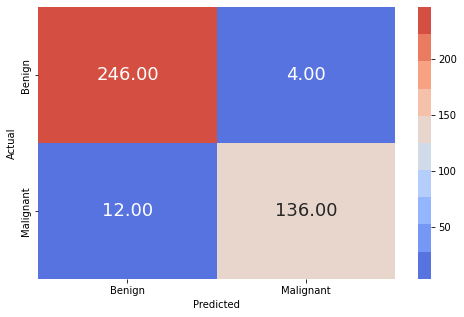

In [76]:
plt.figure(figsize=(8,5))

sns.heatmap(cm_train, annot=True, fmt='.2f', annot_kws={'fontsize':18}, xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'], cmap=sns.color_palette("coolwarm",10))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Area under the ROC Curve: %f 0.9839369158878506


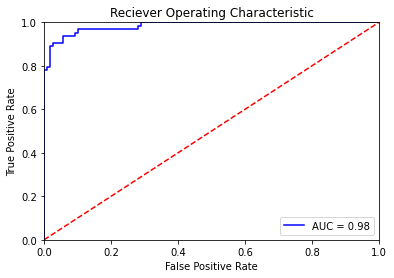

In [77]:
#ROC Curve for Logistic Regression
from sklearn.metrics import roc_curve, auc

fpr,tpr,thresholds = roc_curve(Y_test, y_test_pred_prob[:,1], drop_intermediate=True)
roc_auc = auc(fpr,tpr)
print("Area under the ROC Curve: %f", roc_auc)

plt.title('Reciever Operating Characteristic')
plt.rcParams["figure.figsize"]=(12,8)
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [78]:
i = np.arange(len(tpr))
roc = pd.DataFrame({'fpr': pd.Series(fpr,index=i),'tpr':pd.Series(tpr,index=i),
                   '1-fpr': pd.Series(1-fpr, index=i), 'tf':pd.Series(tpr-(1-fpr),index=i),
                   'thresholds': pd.Series(thresholds, index=i)})
roc.iloc[(roc.tf-0).abs().argsort()[:1]]

,fpr,tpr,1-fpr,tf,thresholds
10,0.056075,0.9375,0.943925,-0.006425,0.583255


[Text(-2.5, 0, ''),
 Text(0.0, 0, ''),
 Text(2.5, 0, ''),
 Text(5.0, 0, ''),
 Text(7.5, 0, ''),
 Text(10.0, 0, ''),
 Text(12.5, 0, ''),
 Text(15.0, 0, ''),
 Text(17.5, 0, ''),
 Text(20.0, 0, '')]

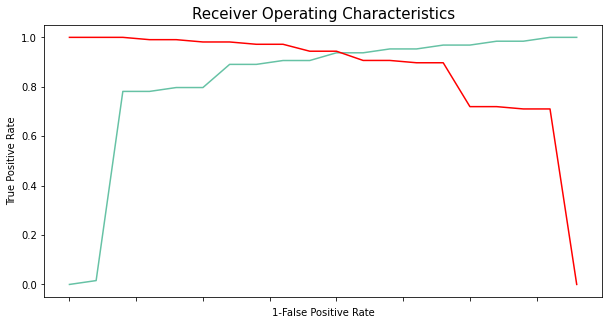

In [79]:
#plot tpr Vs 1-fpr
fig,ax = plt.subplots(figsize=(10,5))
plt.plot(roc['tpr'])
plt.plot(roc['1-fpr'],color='red')
plt.xlabel('1-False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics', fontsize=15)
ax.set_xticklabels([])

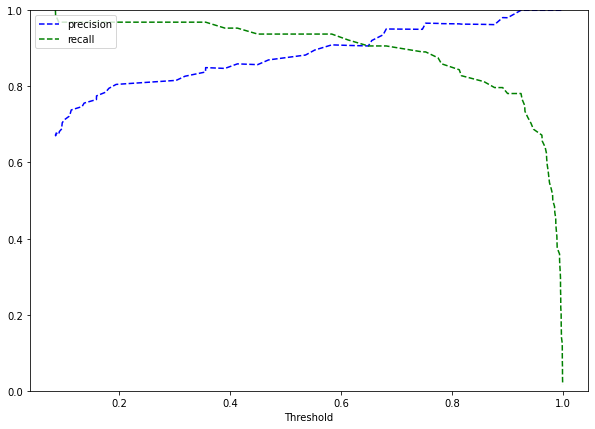

In [80]:
#Precision-Recall Curve
precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(Y_test, y_test_pred_prob[:,1])

plt.figure(figsize=(10,7))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label='precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label='recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

In [81]:
from sklearn.metrics import precision_score, recall_score, precision_recall_curve

In [82]:
pred_proba_df = pd.DataFrame(logReg.predict_proba(X_test))
threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,0.99]
precision_lst = []
recall_lst = []
for i in threshold_list:
    Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    precision = precision_score(Y_test.values.reshape(Y_test.values.size,1),
                               (Y_test_pred.iloc[:,1].values.reshape(Y_test_pred.iloc[:,1].values.size,1)))
    precision_lst.append(precision)
    recall = recall_score(Y_test.values.reshape(Y_test.values.size,1),
                         (Y_test_pred.iloc[:,1].values.reshape(Y_test_pred.iloc[:,1].values.size,1)))
    recall_lst.append(recall)

In [83]:
thresh_df = pd.DataFrame()
thresh_df['Threshold'] = threshold_list
thresh_df['Precision'] = precision_lst
thresh_df['Recall'] = recall_lst

In [84]:
thresh_df

,Threshold,Precision,Recall
0,0.05,0.598131,1.000000
1,0.10,0.712644,0.968750
2,0.15,0.765432,0.968750
3,0.20,0.815789,0.968750
4,0.25,0.815789,0.968750
5,0.30,0.815789,0.968750
6,0.35,0.837838,0.968750
7,0.40,0.859155,0.953125
8,0.45,0.869565,0.937500
9,0.50,0.882353,0.937500


Text(0.5, 1.0, 'Recall Curve at various cut-offs')

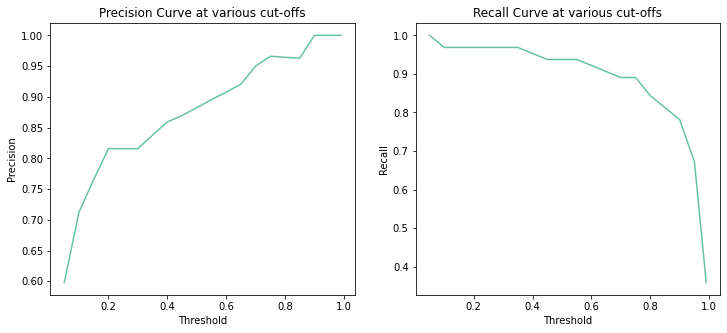

In [85]:
#plotting precision curve and recall  curve fro various thresholds
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2, sharex=True,figsize=(12,5))

#use ax1 to plot precision
thresh_df.plot(x='Threshold', y='Precision', legend=False, ax=ax1)
ax1.set_ylabel('Precision')
ax1.set_title('Precision Curve at various cut-offs')

#use ax2 to plot recall
thresh_df.plot(x='Threshold', y='Recall', legend=False, ax=ax2)
ax2.set_ylabel('Recall')
ax2.set_title('Recall Curve at various cut-offs')

Confusion Matrix: 
 [[99  8]
 [ 4 60]]


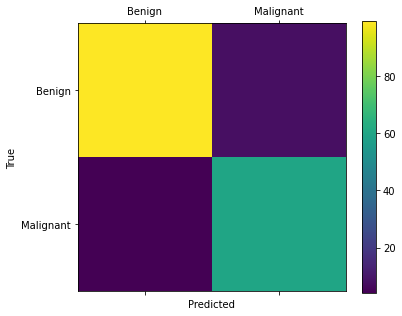

In [86]:
#Confusion Matrix
labels=['Benign', 'Malignant']
conf_matrix = confusion_matrix(Y_test,y_test_pred)
print("Confusion Matrix: \n", conf_matrix)
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
cax = ax.matshow(conf_matrix)
fig.colorbar(cax)
ax.set_xticklabels(['']+labels)
ax.set_yticklabels(['']+labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

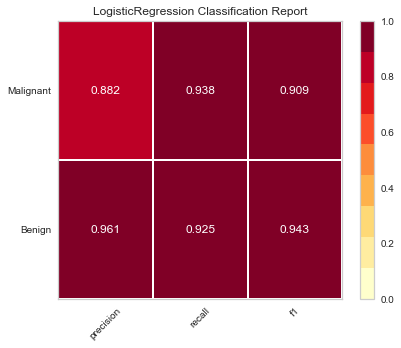

In [87]:
#classification report
from yellowbrick.classifier import ClassificationReport

fig = plt.figure(figsize=(6,5))

visualizer = ClassificationReport(logReg, classes=['Benign','Malignant'])
visualizer.fit(X_train,Y_train)
visualizer.score(X_test,Y_test)
g = visualizer.poof()

<AxesSubplot:ylabel='Feature'>

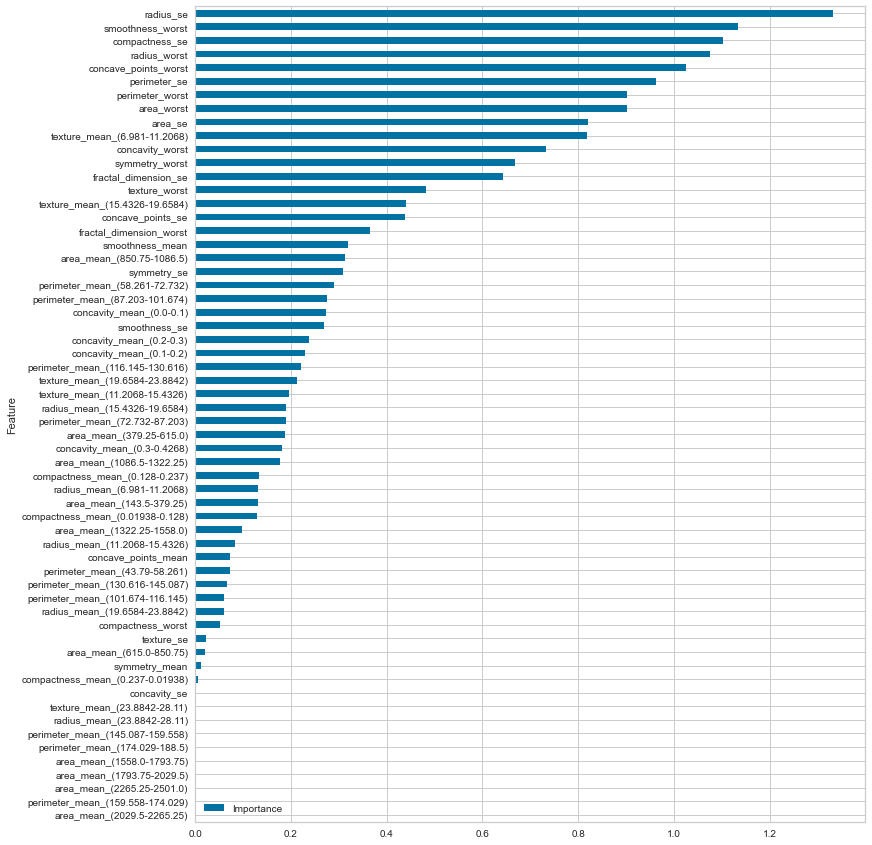

In [88]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, Y_train)


coefficients = model.coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(12, 15))

Top 5 features:
radius_se, smoothness_worst, compactness_se, radius_worst, concave_points_worst

In [89]:
#Parameter Tuning
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
clf = GridSearchCV(LogisticRegression(penalty='l2'), param_grid)

clf.fit(X_train,Y_train)
clf.best_params_

print('Mean Accuracy: %.3f' % clf.best_score_)
print('Config: %s' % clf.best_params_)

Mean Accuracy: 0.977
Config: {'C': 1}
